## Preprocessing

In [101]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [102]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME' and STATUS, SPECIAL_CONSIDERATIONS, which were found to be two of the least impactful feauteres.
application = application_df.drop(columns= ["EIN", "NAME", "STATUS", "SPECIAL_CONSIDERATIONS", "INCOME_AMT"])

In [103]:
# Determine the number of unique values in each column.
application.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [104]:
# Look at APPLICATION_TYPE value counts for binning
application['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [105]:
# Choose a cutoff value and create a list of application types to be replaced
# Replace in dataframe

application['APPLICATION_TYPE'] = application['APPLICATION_TYPE'].replace(["T13", "T2", "T25", "T14", "T29", "T15", "T17", "T12"],"Other")

# Check to make sure binning was successful
application['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [106]:
# Look at CLASSIFICATION value counts for binning
class_counts = application['CLASSIFICATION'].value_counts()

In [107]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application['CLASSIFICATION'].value_counts().loc[lambda x : x > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [108]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_counts[class_counts <100].index)
# classifications_to_replace

# Replace in dataframe application['APPLICATION_TYPE'].replace(["T2", "T25", "T14", "T29", "T15", "T17"],"Other")
# application['CLASSIFICATION'] = 
for i in classifications_to_replace:
  application['CLASSIFICATION'] = application['CLASSIFICATION'].replace(i ,"Other")
    
# Check to make sure binning was successful
application['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [109]:
# Convert categorical data to numeric with `pd.get_dummies`
# 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'
application_dummies = pd.get_dummies(application)
application_dummies.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,5000,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,108590,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,6692,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,142590,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [110]:
# Split our preprocessed data into our features and target arrays
target = application_dummies['IS_SUCCESSFUL']
features = application_dummies.drop('IS_SUCCESSFUL', axis=1)
features_name = features.columns
features.head()
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=78) 

In [111]:
# Create a StandardScaler instances
scaler = StandardScaler()
# .fit_transform(application_dummies)

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [116]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=9, activation="relu", input_dim=38))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=7, activation="relu"))
# nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))
# nn_model.add(tf.keras.layers.Dense(units=9, activation="relu"))
# nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))
# nn_model.add(tf.keras.layers.Dense(units=7, activation="relu"))
# nn_model.add(tf.keras.layers.Dense(units=7, activation="relu"))
# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 9)                 351       
                                                                 
 dense_87 (Dense)            (None, 7)                 70        
                                                                 
 dense_88 (Dense)            (None, 1)                 8         
                                                                 
Total params: 429
Trainable params: 429
Non-trainable params: 0
_________________________________________________________________


In [117]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [118]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6152 - accuracy: 0.6911
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5689 - accuracy: 0.7245
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5611 - accuracy: 0.7260
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5585 - accuracy: 0.7266
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5576 - accuracy: 0.7268
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5572 - accuracy: 0.7269
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5565 - accuracy: 0.7264
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.7276
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7275
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5555 - accura

In [119]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5537 - accuracy: 0.7247 - 405ms/epoch - 2ms/step
Loss: 0.5537437796592712, Accuracy: 0.7246647477149963


In [ ]:
# Export our model to HDF5 file
nn_model.save("model_optimized.h5")

In [34]:
# Initial imports
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [35]:
# Fitting the Random Forest Model
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Making Predictions Using the Random Forest Model
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [36]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, features.columns), reverse=True)

[(0.40025079000030256, 'ASK_AMT'),
 (0.14288465306203552, 'AFFILIATION_CompanySponsored'),
 (0.11545753285335124, 'AFFILIATION_Independent'),
 (0.026262375896859484, 'APPLICATION_TYPE_T5'),
 (0.025276261719125784, 'ORGANIZATION_Association'),
 (0.024374528866914408, 'APPLICATION_TYPE_T10'),
 (0.020221060254979602, 'ORGANIZATION_Trust'),
 (0.018661493919556512, 'CLASSIFICATION_C2100'),
 (0.018274199890293382, 'CLASSIFICATION_C2000'),
 (0.017742911551111976, 'APPLICATION_TYPE_T19'),
 (0.01662734569699723, 'APPLICATION_TYPE_T4'),
 (0.015675351814611747, 'APPLICATION_TYPE_T3'),
 (0.013757993793046144, 'CLASSIFICATION_C1000'),
 (0.012579218235168594, 'CLASSIFICATION_C7000'),
 (0.011918898354165033, 'USE_CASE_ProductDev'),
 (0.011460795503640613, 'APPLICATION_TYPE_T6'),
 (0.010907223624331856, 'USE_CASE_Preservation'),
 (0.009800768727748497, 'CLASSIFICATION_C1200'),
 (0.009620392219463373, 'INCOME_AMT_0'),
 (0.007999424111655625, 'CLASSIFICATION_C3000'),
 (0.007535446013761403, 'INCOME_AMT_

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

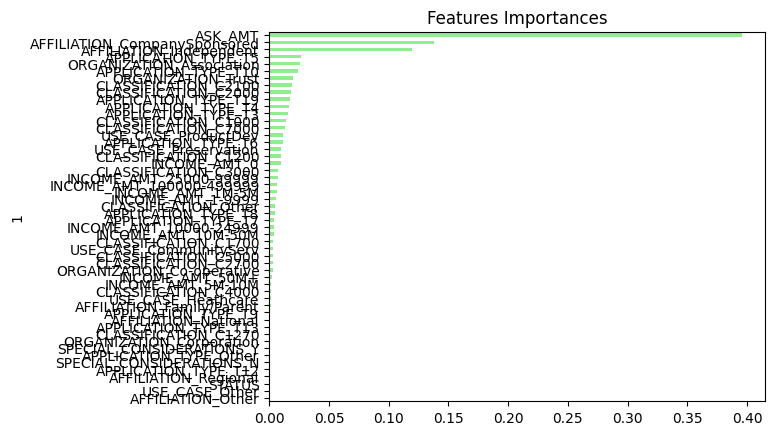

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_,features.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)